# Proyek Analisis Data: Air Quality

**Nama:** Delima Ester Purba  
**Email:** m305b4kx1036@bangkit.academy  
**ID Dicoding:** delima_purba_a5Sp



Menentukan Pertanyaan Bisnis 
1. Bagaimana persentasi air quality di station Aotizhongxin dari tahun 2013 hingga tahun 2017 ? 
2. Bagaimana pollutant PM2.5 di setiap bulannya pada rentang tahun 2013 - 2016 ?  

# Import Packages yang saya gunakan 

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st 

# DATA WRANGLING

Gathering Data 

In [4]:
AQin_Aotizhongxin_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/refs/heads/master/PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv")
AQin_Aotizhongxin_df.head(100)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,2013,3,4,23,58.0,94.0,46.0,86.0,1100.0,84.0,7.7,1015.7,-9.3,0.0,SW,2.1,Aotizhongxin
96,97,2013,3,5,0,71.0,108.0,66.0,78.0,1100.0,84.0,4.7,1015.2,-9.1,0.0,SW,1.6,Aotizhongxin
97,98,2013,3,5,1,91.0,127.0,75.0,75.0,1200.0,84.0,1.1,1014.7,-7.9,0.0,SW,0.0,Aotizhongxin
98,99,2013,3,5,2,100.0,129.0,58.0,79.0,1200.0,84.0,-0.6,1014.4,-8.1,0.0,S,0.0,Aotizhongxin


2. Penilaian Data (Assesing Data)

ASSESING DATA TABEL AQin_Aotizhongxin

In [5]:
AQin_Aotizhongxin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [6]:
AQin_Aotizhongxin_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [7]:
AQin_Aotizhongxin_df.duplicated().sum()

np.int64(0)

Cleaning Data

Untuk mengatasi nilai yang value nya missing saya mengisi nilai NAN tersebut dengan nilai tertentu , dimana saya menggunakan nilai rata rata atau nilai yang paling sering muncul 

In [8]:
AQin_Aotizhongxin_df.fillna({
    'CO' : AQin_Aotizhongxin_df['CO'].mean(),
    'PM2.5' : AQin_Aotizhongxin_df['PM2.5'].mean(),
    'PM10' : AQin_Aotizhongxin_df['PM10'].mean(),
    'SO2' : AQin_Aotizhongxin_df['SO2'].mean(),
    'NO2' : AQin_Aotizhongxin_df['NO2'].mean(),
    'O3' : AQin_Aotizhongxin_df['O3'].mean(),
    'TEMP' : AQin_Aotizhongxin_df['TEMP'].mean(),
    'DEWP' : AQin_Aotizhongxin_df['DEWP'].mean(),
    'RAIN' : AQin_Aotizhongxin_df['RAIN'].mean(),
    'WSPM' : AQin_Aotizhongxin_df['WSPM'].mean(),
    'PM10' : AQin_Aotizhongxin_df['PM10'].mean(),
    'PRES' : AQin_Aotizhongxin_df['PRES'].mean()
},inplace=True)

In [9]:
AQin_Aotizhongxin_df.isna().sum()

No          0
year        0
month       0
day         0
hour        0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd         81
WSPM        0
station     0
dtype: int64

In [10]:
AQin_Aotizhongxin_df.dropna(inplace=True)

Dari Hasil kode ini dapat dilihat bahwa value value yang ada pada setiap kolom tidak ada yang missing lagi 

In [11]:
AQin_Aotizhongxin_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

ASSESING DATA TABEL AQin_Dongsi

In [12]:
AQin_Aotizhongxin_df.dropna(inplace=True)

In [13]:
AQin_Aotizhongxin_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

ASSESSING

# EXPLORATORY DATA ANALYSIS 

In [14]:
AQin_Aotizhongxin_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,34983.000000,34983.000000,34983.000000,34983.000000,34983.000000,34983.000000,34983.000000,34983.000000,34983.000000,34983.000000,34983.000000,34983.000000,34983.000000,34983.000000,34983.000000,34983.000000
mean,17501.749621,2014.658949,6.524398,15.724323,11.501701,82.751562,110.052098,17.384518,59.261891,1262.131482,56.407009,13.600091,1011.835906,3.129627,0.067547,1.711037
std,10110.384422,1.175570,3.446517,8.801470,6.918731,81.050604,94.274443,22.531209,36.546255,1189.836735,56.508695,11.395763,10.403209,13.689808,0.910844,1.203059
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8747.500000,2014.000000,4.000000,8.000000,6.000000,23.000000,39.000000,3.000000,31.000000,500.000000,9.000000,3.200000,1003.200000,-8.100000,0.000000,0.900000
50%,17497.000000,2015.000000,7.000000,16.000000,12.000000,61.000000,89.000000,9.000000,55.000000,900.000000,46.000000,14.600000,1011.400000,3.800000,0.000000,1.400000
75%,26247.500000,2016.000000,10.000000,23.000000,17.000000,112.000000,153.000000,21.000000,81.000000,1500.000000,80.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


In [15]:
AQin_Aotizhongxin_df.duplicated().sum()

np.int64(0)

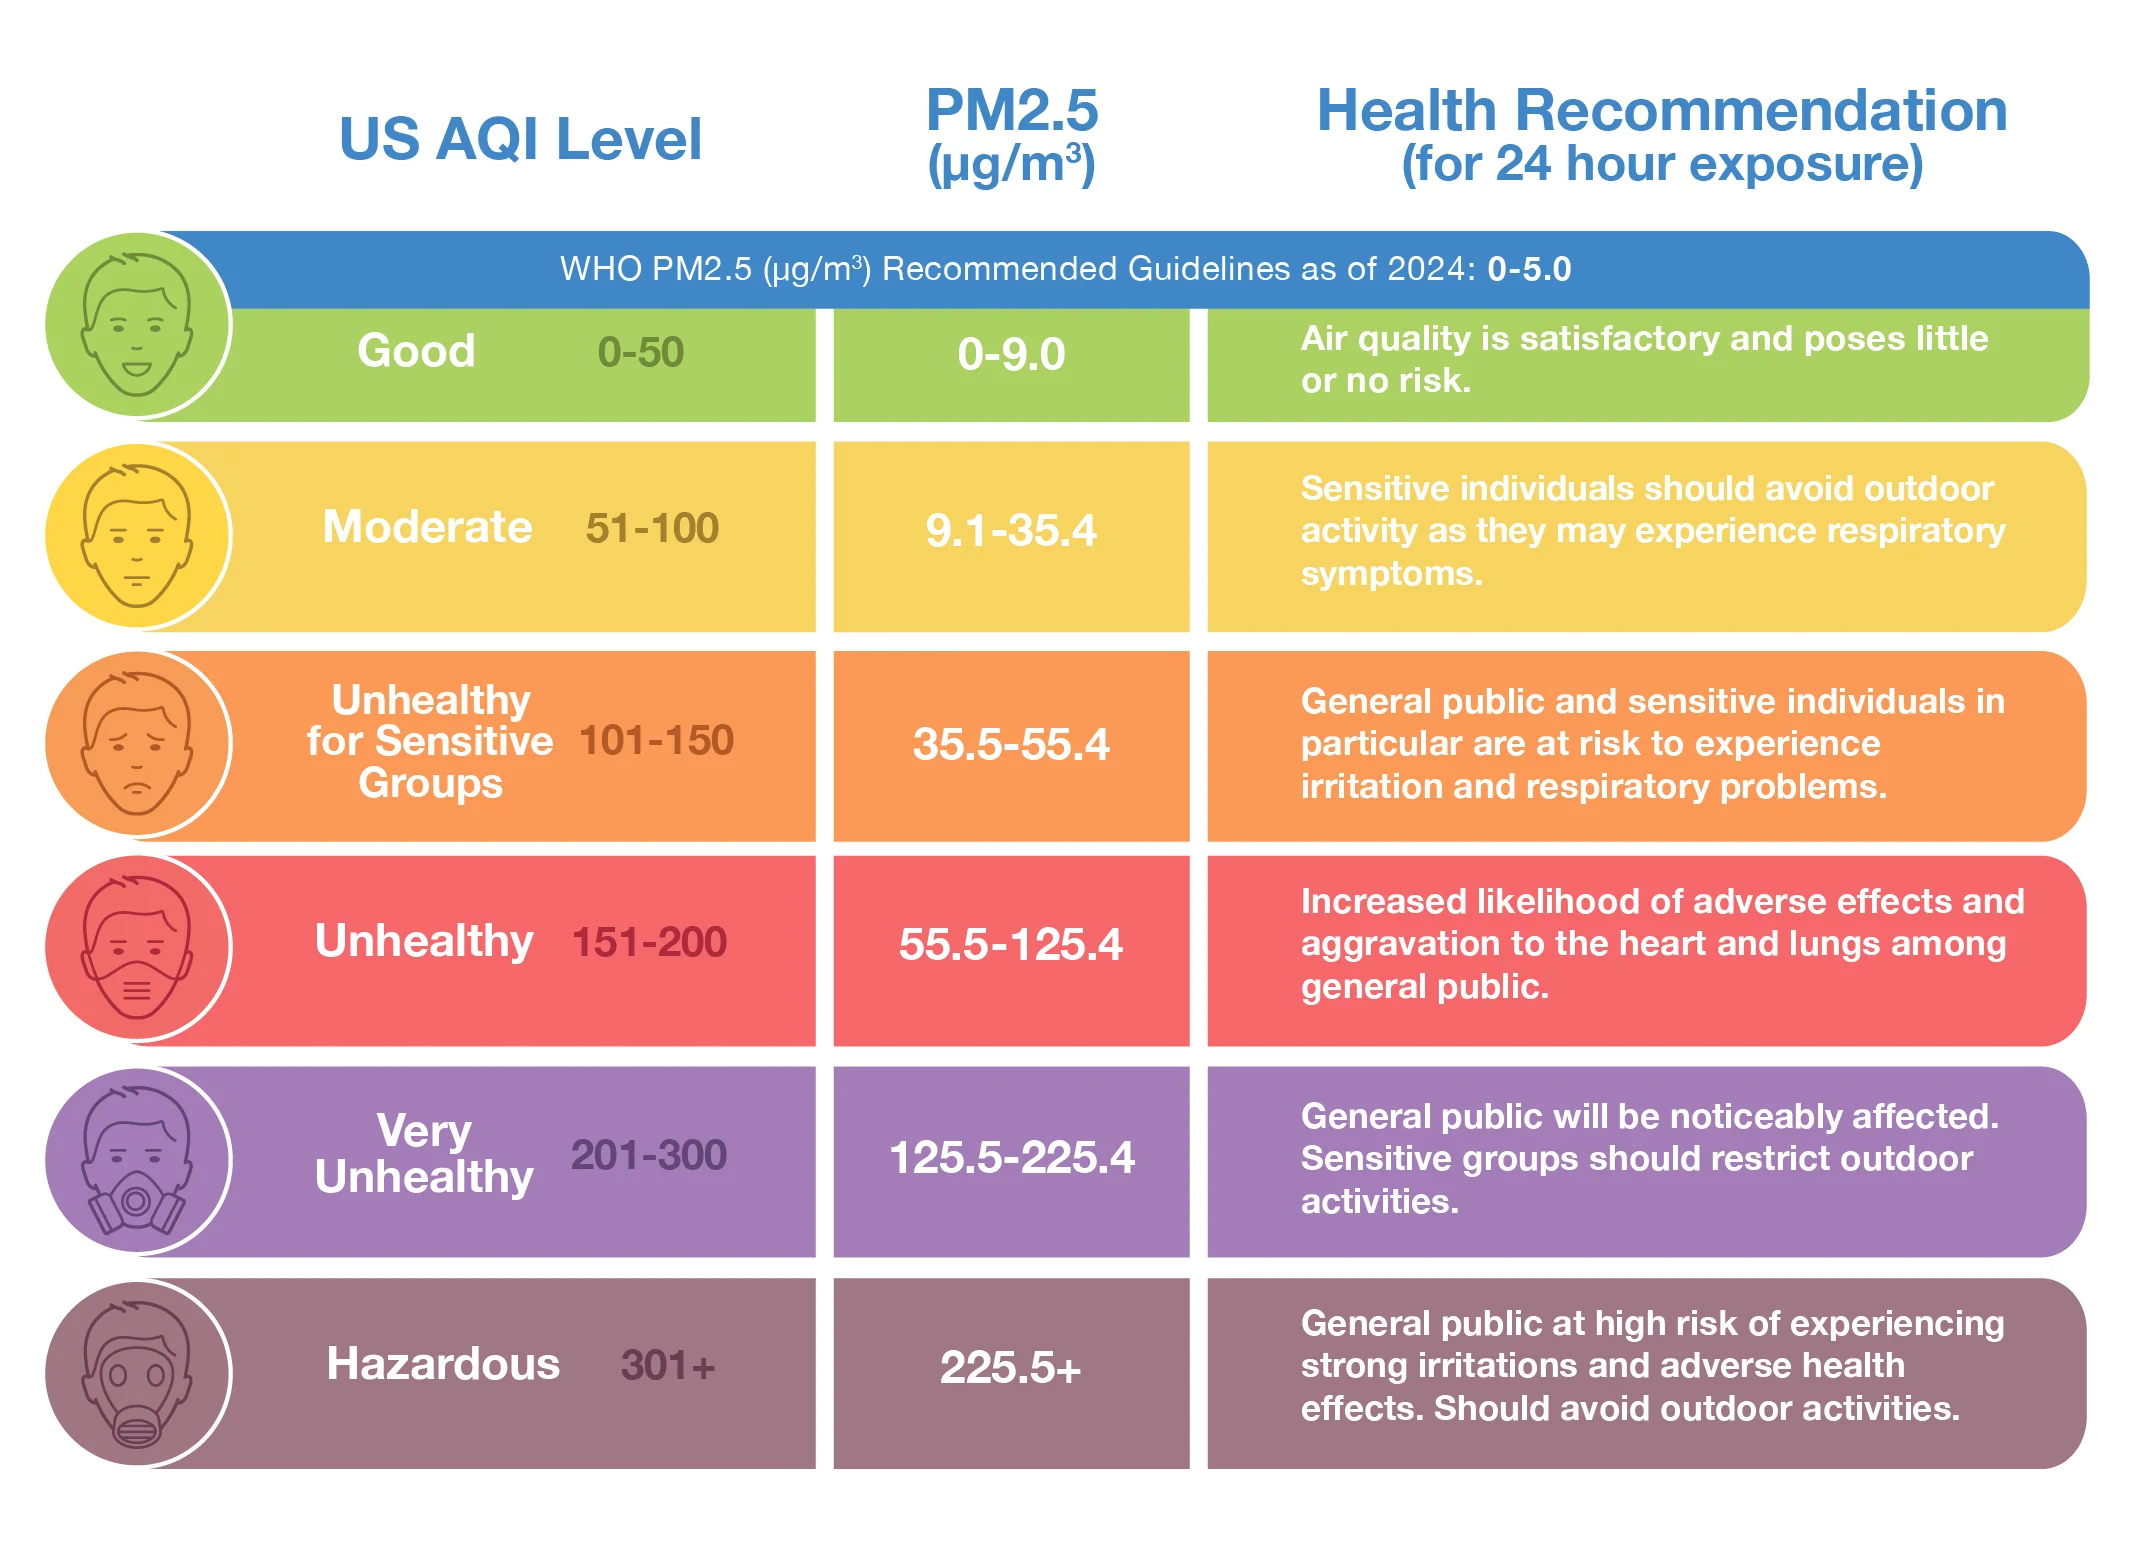

Air Quality Based On PM2.5 

In [16]:
# Fungsi untuk menghitung nilai AQI berdasarkan PM2.5 dan DataFrame AQI
AQI = pd.read_csv("MenghitungAQI.csv")
def calculate(PM25_Value, AQI):
    for index, row in AQI.iterrows():
        # Periksa apakah nilai PM2.5 berada dalam batas CO
        if row['CObatasbawah'] <= PM25_Value <= row['CObatasatas']:
            # Hitung nilai AQI menggunakan rumus yang benar
            AQI_value = ((row['AQIbatasatas'] - row['AQIbatasbawah']) /
                         (row['CObatasatas'] - row['CObatasbawah'])) * (PM25_Value - row['CObatasbawah']) + row['AQIbatasbawah']
            return AQI_value
    return None  # Jika tidak ada rentang yang cocok
# Menghitung AQI untuk setiap nilai PM2.5 dan menyimpannya di kolom baru 'AQI'
AQin_Aotizhongxin_df['AQI'] = AQin_Aotizhongxin_df['PM2.5'].apply(lambda x: calculate(x, AQI))
# Definisikan batasan untuk setiap kategori AQI
categories = {
    'Good': (0, 50),
    'Moderate': (51, 100),
    'Unhealthy for Sensitive Groups': (101, 150),
    'Unhealthy': (151, 200),
    'Very Unhealthy': (201, 300),
    'Hazardous': (301, float('inf'))  # menggunakan float('inf') untuk batas atas tak terbatas
}
# Inisialisasi dictionary untuk menyimpan DataFrame untuk setiap kategori
AQI_dict = {}
# Looping untuk mengelompokkan DataFrame berdasarkan kategori
for category, (lower, upper) in categories.items():
    AQI_dict[category] = AQin_Aotizhongxin_df[
        (AQin_Aotizhongxin_df['AQI'] >= lower) & 
        (AQin_Aotizhongxin_df['AQI'] <= upper)
    ]
category_counts = {category: len(df) for category, df in AQI_dict.items()}
AQIValue = [AQin_Aotizhongxin_df['AQI']]

def assign_category(AQIValue):
    for category, (lower, upper) in categories.items():
        if lower <= AQIValue <= upper:
            return category
    return "Unidentified"

AQin_Aotizhongxin_df['Kategori'] = AQin_Aotizhongxin_df['AQI'].apply(assign_category)

# Menampilkan DataFrame dengan kolom baru
AQin_Aotizhongxin_df


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,AQI,Kategori
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,22.222222,Good
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,44.444444,Good
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,38.888889,Good
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,33.333333,Good
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,16.666667,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin,56.403042,Moderate
35060,35061,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin,58.266160,Moderate
35061,35062,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin,63.855513,Moderate
35062,35063,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Aotizhongxin,73.171103,Moderate


In [17]:
AQin_Aotizhongxin_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5         0
PM10          0
SO2           0
NO2           0
CO            0
O3            0
TEMP          0
PRES          0
DEWP          0
RAIN          0
wd            0
WSPM          0
station       0
AQI         722
Kategori      0
dtype: int64

In [18]:
AQin_Aotizhongxin_df.dropna(inplace=True)
AQin_Aotizhongxin_df.isna().sum()

No          0
year        0
month       0
day         0
hour        0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd          0
WSPM        0
station     0
AQI         0
Kategori    0
dtype: int64

# Visualization & Explanatory Analysis

Pertanyaan 1 : Bagaimana persentasi air quality di station Aotizhongxin dari tahun 2013 hingga tahun 2017 ? 

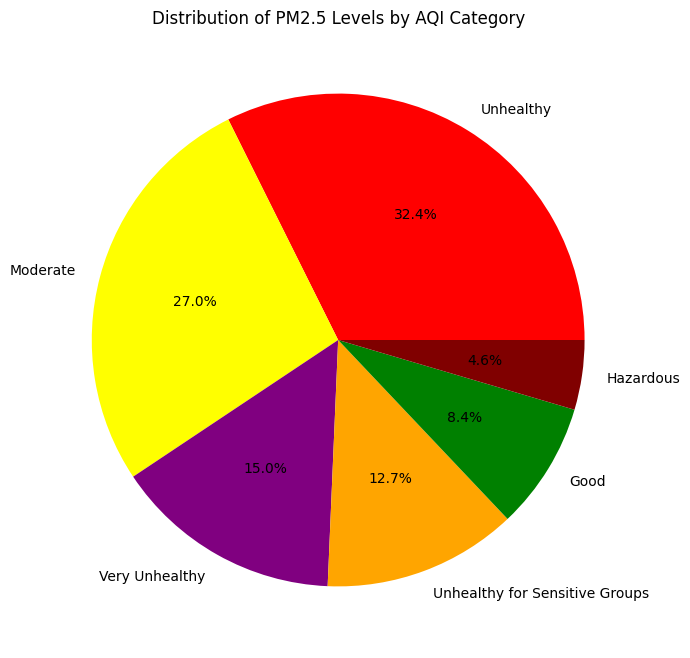

In [19]:
category_counts = AQin_Aotizhongxin_df['Kategori'].value_counts()
# Mengambil kategori dan jumlahnya
categories = category_counts.index  # Indeks dari Series category_counts
counts = category_counts.values      # Nilai dari Series category_counts
colors = []
for kategori in categories:
    if kategori == 'Good':
        colors.append('green')
    elif kategori == 'Moderate':
        colors.append('yellow')
    elif kategori == 'Unhealthy for Sensitive Groups':
        colors.append('orange')
    elif kategori == 'Unhealthy':
        colors.append('red')
    elif kategori == 'Very Unhealthy':
        colors.append('purple')
    elif kategori == 'Hazardous':
        colors.append('maroon')
    else:
        colors.append('gray')

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=categories, autopct='%1.1f%%', colors=colors)
plt.title('Distribution of PM2.5 Levels by AQI Category')

# Menampilkan pie chart
plt.show()

In [20]:
Annual_avg_pm25 = AQin_Aotizhongxin_df.groupby( 'year')['AQI'].mean().reset_index()
Annual_avg_pm25

,year,AQI
0,2013,145.725885
1,2014,153.774609
2,2015,142.020274
3,2016,135.359646
4,2017,138.260923


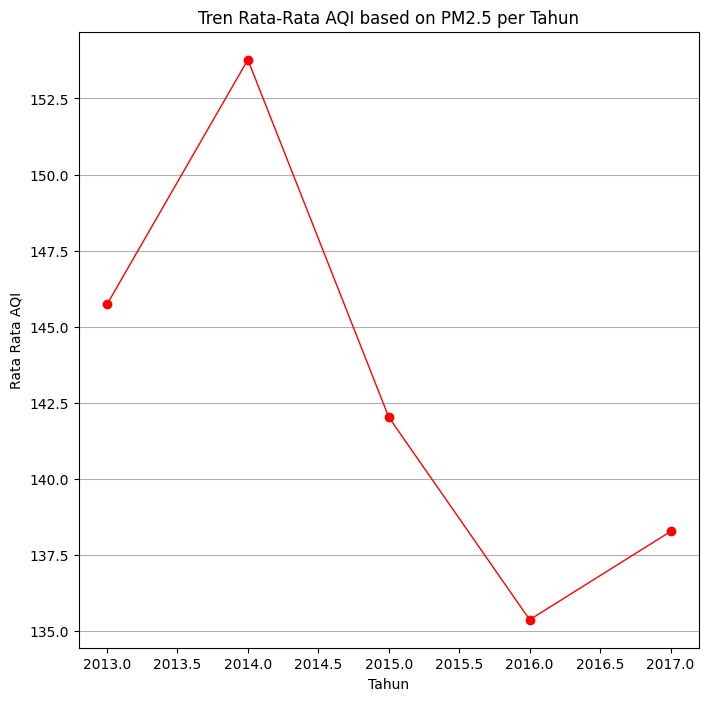

In [21]:
plt.figure(figsize=(8, 8))
plt.plot(Annual_avg_pm25['year'],Annual_avg_pm25['AQI'], marker='o',linewidth = 1,color ='red')
plt.title('Tren Rata-Rata AQI based on PM2.5 per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Rata Rata AQI')
plt.grid(axis='y')
plt.show()

Pertanyaan  2 : Bagaimana pollutant PM2.5 di setiap bulannya pada rentang tahun 2013 - 2016 ? 

In [22]:
Monthly_AvarageAQI_Aotizhongxin = AQin_Aotizhongxin_df.groupby(['year','month'])['PM2.5'].mean().reset_index()
Monthly_AvarageAQI_Aotizhongxin 

,year,month,PM2.5
0,2013,3,104.040845
1,2013,4,58.828125
2,2013,5,82.661047
3,2013,6,101.569426
4,2013,7,68.674293
5,2013,8,61.299694
6,2013,9,76.251448
7,2013,10,89.254229
8,2013,11,70.873440
9,2013,12,72.693903


C:\Users\toran\AppData\Local\Temp\ipykernel_12212\695145995.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='PM2.5', data=data_year, palette=colors, ax=ax[i])
C:\Users\toran\AppData\Local\Temp\ipykernel_12212\695145995.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='PM2.5', data=data_year, palette=colors, ax=ax[i])
C:\Users\toran\AppData\Local\Temp\ipykernel_12212\695145995.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='PM2.5', data=data_year, palette=colors, ax=ax[i])
C:\Users\toran\A

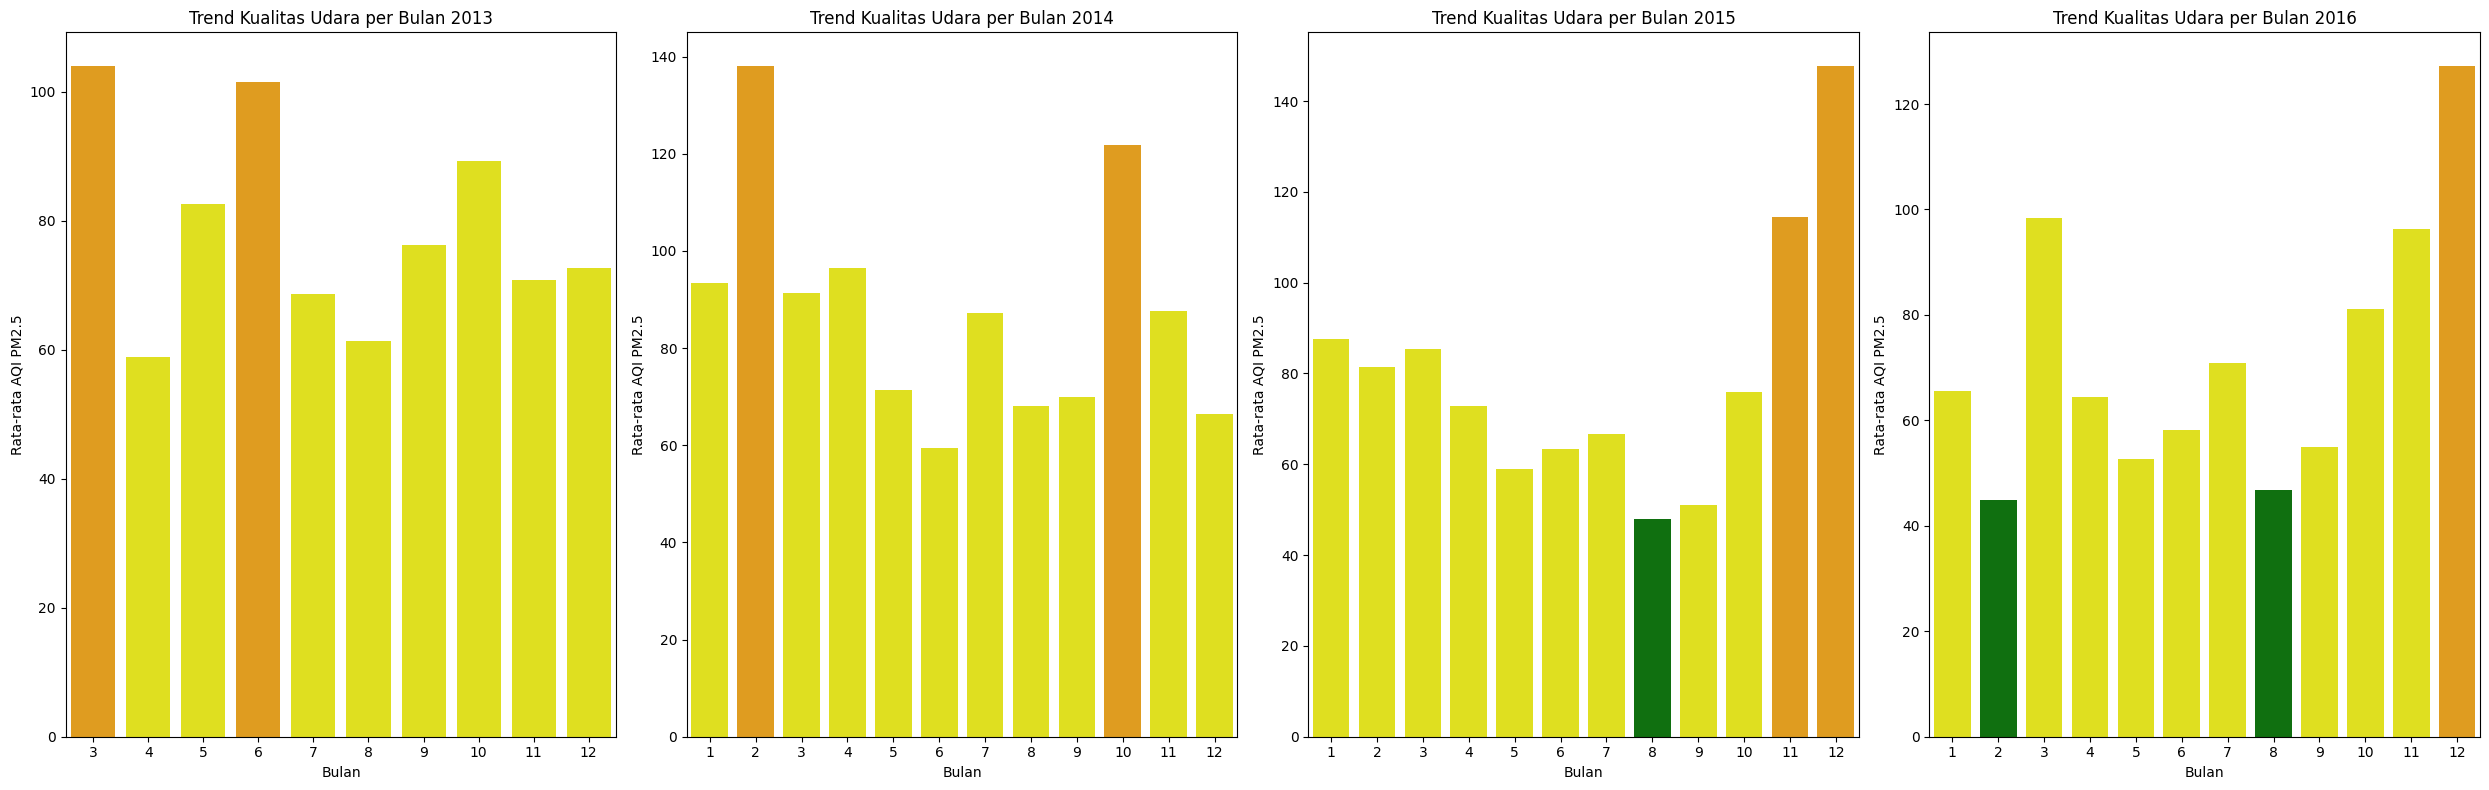

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(25, 8))
years = [2013, 2014, 2015, 2016]

for i, year in enumerate(years):
    # Filter data untuk tahun yang sesuai
    data_year = Monthly_AvarageAQI_Aotizhongxin[Monthly_AvarageAQI_Aotizhongxin['year'] == year]

    # Buat list untuk menyimpan warna berdasarkan kondisi AQI
    colors = []
    for value in data_year['PM2.5']:
        if value >= 0 and value <= 50:
            colors.append('green')
        elif value >= 51 and value <= 100:
            colors.append('yellow')
        elif value >= 101 and value <= 150:
            colors.append('orange')
        elif value >= 151 and value <= 200:
            colors.append('red')
        elif value >= 201 and value <= 300:
            colors.append('purple')
        else:
            colors.append('black')

    # Membuat bar plot dengan warna yang sesuai
    sns.barplot(x='month', y='PM2.5', data=data_year, palette=colors, ax=ax[i])

    ax[i].set_title(f'Trend Kualitas Udara per Bulan {year}')
    ax[i].set_xlabel('Bulan')
    ax[i].set_ylabel('Rata-rata AQI PM2.5')

plt.tight_layout()
plt.show()

bulan 8 2015 dan bulan bulan 2 dan 8 di tahun 2016 dan dari data diatas dapat kita lihat bahwa rata rata AQI nya berada di warna yellow dan orange yang artinya adalah AQI unhealthy for sensitive grups dan moderate 

# Analisis Lanjutan

In [24]:
AQin_Dongsi_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/refs/heads/master/PRSA_Data_20130301-20170228/PRSA_Data_Dongsi_20130301-20170228.csv")
AQin_Dongsi_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


In [27]:
AQin_Dongsi_df.isna().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5        750
PM10         553
SO2          663
NO2         1601
CO          3197
O3           664
TEMP          20
PRES          20
DEWP          20
RAIN          20
wd            78
WSPM          14
station        0
Kategori       0
dtype: int64

In [28]:
AQin_Dongsi_df.fillna({
    'CO' : AQin_Dongsi_df['CO'].mean(),
    'PM2.5' : AQin_Dongsi_df['PM2.5'].mean(),
    'PM10' : AQin_Dongsi_df['PM10'].mean(),
    'SO2' :AQin_Dongsi_df['SO2'].mean(),
    'NO2' :AQin_Dongsi_df['NO2'].mean(),
    'O3' :AQin_Dongsi_df['O3'].mean(),
    'TEMP' : AQin_Dongsi_df['TEMP'].mean(),
    'DEWP' : AQin_Dongsi_df['DEWP'].mean(),
    'RAIN' : AQin_Dongsi_df['RAIN'].mean(),
    'WSPM' : AQin_Dongsi_df['WSPM'].mean(),
    'PM10' : AQin_Dongsi_df['PM10'].mean(),
    'PRES' : AQin_Dongsi_df['PRES'].mean()
},inplace=True)

In [29]:
AQin_Aotizhongxin_df.dropna(inplace=True)

In [30]:
AQin_Aotizhongxin_df.isna().sum()

No           0
year         0
month        0
day          0
hour         0
PM2.5        0
PM10         0
SO2          0
NO2          0
CO           0
O3           0
TEMP         0
PRES         0
DEWP         0
RAIN         0
wd           0
WSPM         0
station      0
AQI          0
Kategori     0
Date Time    0
dtype: int64

In [31]:
AQin_Dongsi_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.00000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,86.194297,110.336742,18.531107,53.699443,1330.069131,57.210637,13.67149,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,85.644198,97.442239,22.688062,33.174871,1135.697130,57.481150,11.45515,10.263131,13.806757,0.786058,1.280113
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.642600,-16.80000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,38.000000,4.000000,28.000000,600.000000,13.000000,3.10000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,63.000000,88.000000,10.000000,49.000000,1100.000000,46.000000,14.60000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,117.000000,150.000000,24.000000,72.000000,1600.000000,80.000000,23.50000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,737.000000,955.000000,300.000000,258.000000,10000.000000,1071.000000,41.10000,1042.000000,28.800000,46.400000,10.500000


In [25]:
# Definisikan batasan untuk setiap kategori AQI
categories = {
    'Good': (0, 54),
    'Moderate': (55, 154),
    'Unhealthy for Sensitive Groups': (155, 254),
    'Unhealthy': (255, 354),
    'Very Unhealthy': (355, 424),
    'Hazardous': (425, float('inf'))  # menggunakan float('inf') untuk batas atas tak terbatas
}

# Inisialisasi dictionary untuk menyimpan DataFrame untuk setiap kategori
AQI_dict = {}

# Looping untuk mengelompokkan DataFrame berdasarkan kategori
for category, (lower, upper) in categories.items():
    AQI_dict[category] = AQin_Dongsi_df[
        (AQin_Dongsi_df['PM10'] >= lower) & 
        (AQin_Dongsi_df['PM10'] <= upper)
    ]

category_counts = {category: len(df) for category, df in AQI_dict.items()}

def assign_category(pm10_value):
    for category, (lower, upper) in categories.items():
        if lower <= pm10_value <= upper:
            return category
    return "Unidentified"

AQin_Dongsi_df['Kategori'] = AQin_Dongsi_df['PM10'].apply(assign_category)

# Menampilkan DataFrame dengan kolom baru
AQin_Dongsi_df


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,Kategori
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi,Good
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi,Good
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi,Good
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi,Good
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,16.0,51.0,3.0,29.0,400.0,73.0,12.5,1013.5,-16.2,0.0,NW,2.4,Dongsi,Good
35060,35061,2017,2,28,20,18.0,45.0,3.0,43.0,500.0,54.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Dongsi,Good
35061,35062,2017,2,28,21,23.0,58.0,5.0,61.0,700.0,28.0,10.8,1014.2,-13.3,0.0,NW,1.1,Dongsi,Moderate
35062,35063,2017,2,28,22,23.0,53.0,9.0,75.0,900.0,15.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Dongsi,Good


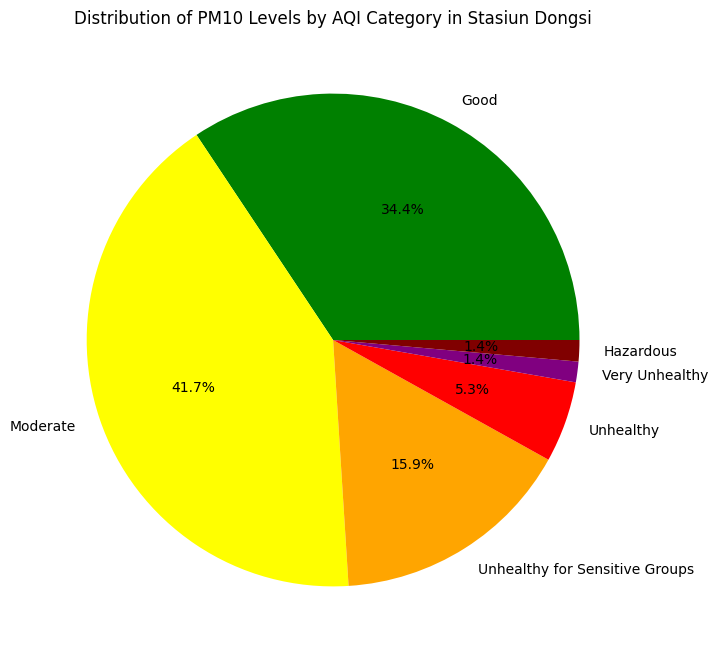

In [32]:
labels = list(category_counts.keys())  
sizes = list(category_counts.values())  

# Plotting pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['green', 'yellow', 'orange', 'red', 'purple', 'maroon'])
plt.title('Distribution of PM10 Levels by AQI Category in Stasiun Dongsi')
plt.show()

In [33]:
Monthly_AvarageAQI_inDongsi = AQin_Dongsi_df.groupby(['year','month'])['PM10'].mean().reset_index()
Monthly_AvarageAQI_inDongsi

,year,month,PM10
0,2013,3,130.967303
1,2013,4,98.572222
2,2013,5,131.985215
3,2013,6,115.661579
4,2013,7,81.618376
5,2013,8,87.899413
6,2013,9,100.243991
7,2013,10,108.959691
8,2013,11,99.522690
9,2013,12,94.555108


C:\Users\toran\AppData\Local\Temp\ipykernel_12212\1533438785.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='PM10', data=data_year, palette=colors, ax=ax[i])
C:\Users\toran\AppData\Local\Temp\ipykernel_12212\1533438785.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='PM10', data=data_year, palette=colors, ax=ax[i])
C:\Users\toran\AppData\Local\Temp\ipykernel_12212\1533438785.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='PM10', data=data_year, palette=colors, ax=ax[i])
C:\Users\toran\A

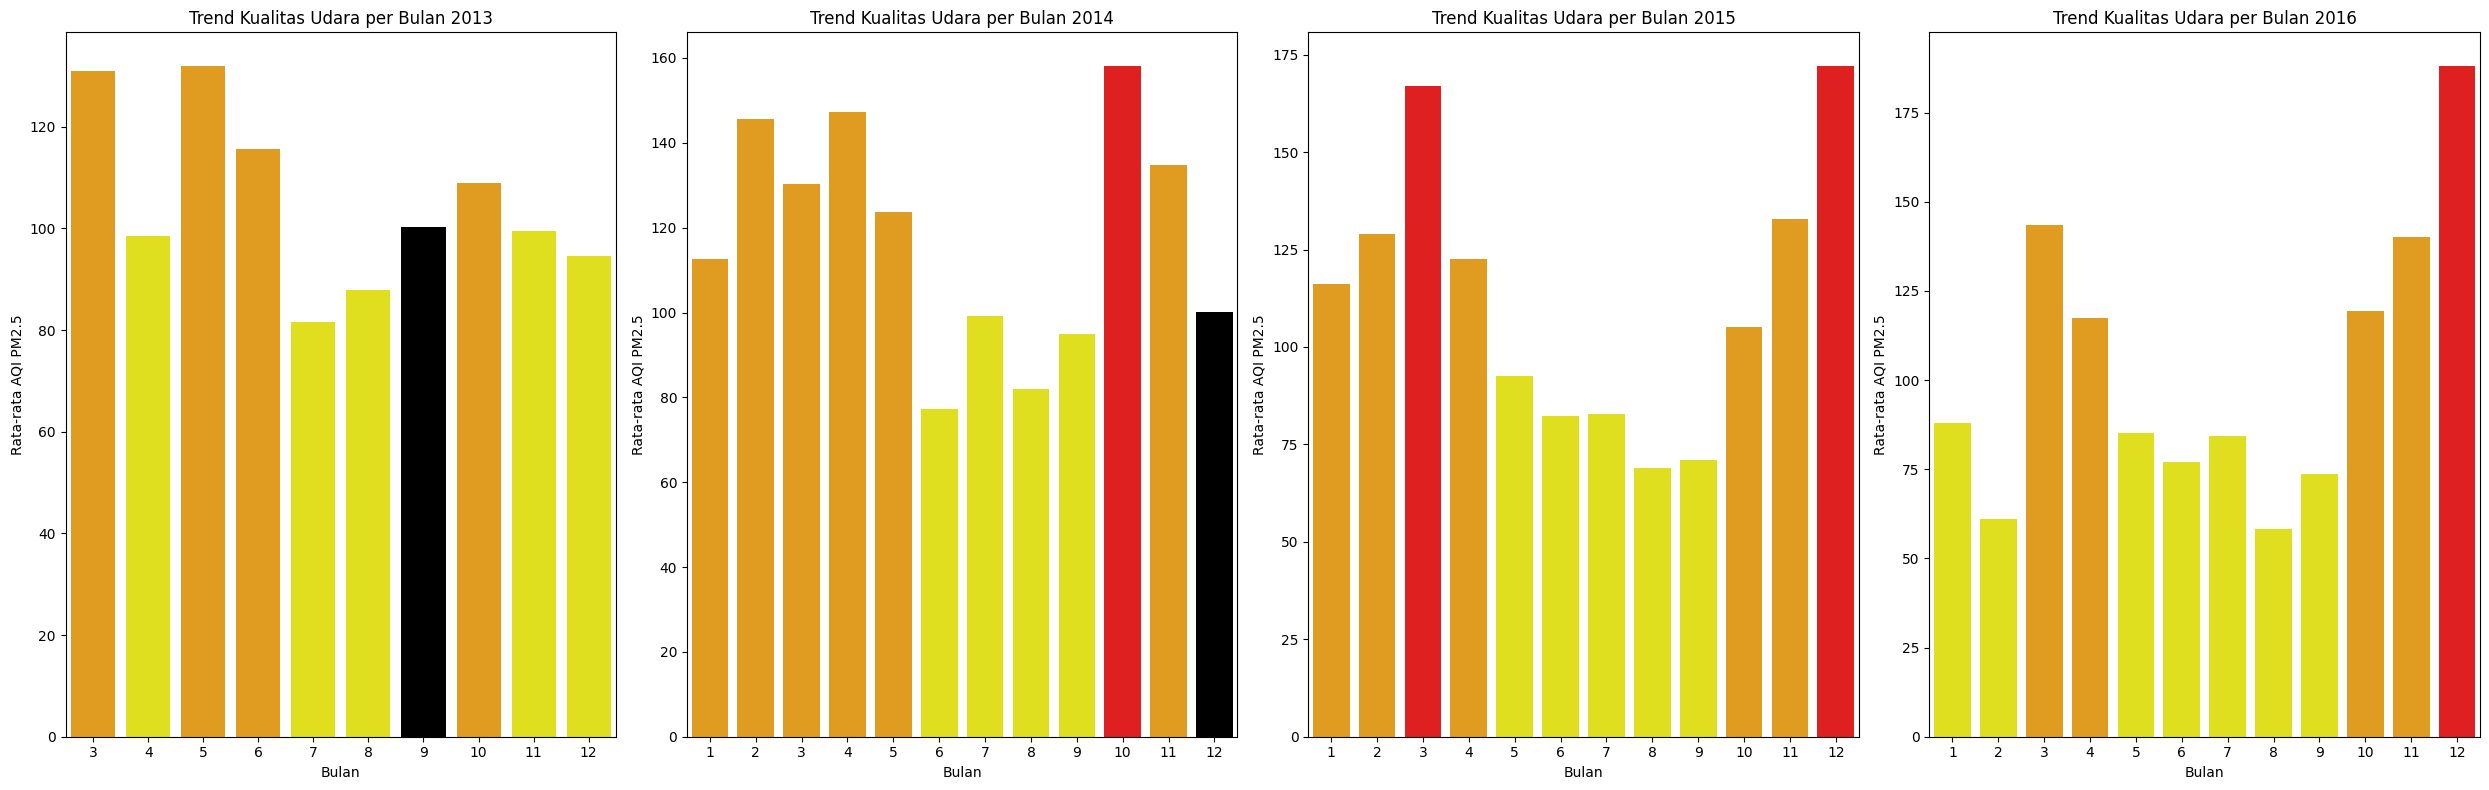

In [34]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(25, 8))
years = [2013, 2014, 2015, 2016]

for i, year in enumerate(years):
    # Filter data untuk tahun yang sesuai
    data_year = Monthly_AvarageAQI_inDongsi[Monthly_AvarageAQI_inDongsi['year'] == year]

    # Buat list untuk menyimpan warna berdasarkan kondisi AQI
    colors = []
    for value in data_year['PM10']:
        if value >= 0 and value <= 50:
            colors.append('green')
        elif value >= 51 and value <= 100:
            colors.append('yellow')
        elif value >= 101 and value <= 150:
            colors.append('orange')
        elif value >= 151 and value <= 200:
            colors.append('red')
        elif value >= 201 and value <= 300:
            colors.append('purple')
        else:
            colors.append('black')

    # Membuat bar plot dengan warna yang sesuai
    sns.barplot(x='month', y='PM10', data=data_year, palette=colors, ax=ax[i])

    ax[i].set_title(f'Trend Kualitas Udara per Bulan {year}')
    ax[i].set_xlabel('Bulan')
    ax[i].set_ylabel('Rata-rata AQI PM2.5')

plt.tight_layout()
plt.show()

In [43]:
RataRataTahunan = AQin_Aotizhongxin_df.groupby('year')['PM10'].mean().reset_index()
RataRataTahunan


,year,PM10
0,2013,109.145053
1,2014,117.993722
2,2015,109.134935
3,2016,92.127319
4,2017,102.534605


In [40]:
Annual_AvarageAQI_inDongsi = AQin_Dongsi_df.groupby('year')['PM10'].mean().reset_index()
Annual_AvarageAQI_inDongsi

,year,PM10
0,2013,105.018146
1,2014,116.939118
2,2015,111.840239
3,2016,103.282334
4,2017,131.536060


In [44]:
Date_time = AQin_Dongsi_df[['day','month','year']].astype(str).agg('-'.join,axis=1)
Date_time
AQin_Dongsi_df['Date Time'] = Date_time
AQin_Dongsi_df['Date Time'] = pd.to_datetime(AQin_Dongsi_df['Date Time'], format='%d-%m-%Y')
AQin_Dongsi_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,Kategori,Date Time
0,1,2013,3,1,0,9.0,9.0,3.000000,17.000000,300.000000,89.000000,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi,Good,2013-03-01
1,2,2013,3,1,1,4.0,4.0,3.000000,16.000000,300.000000,88.000000,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi,Good,2013-03-01
2,3,2013,3,1,2,7.0,7.0,18.531107,17.000000,300.000000,60.000000,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi,Good,2013-03-01
3,4,2013,3,1,3,3.0,3.0,5.000000,18.000000,1330.069131,57.210637,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi,Good,2013-03-01
4,5,2013,3,1,4,3.0,3.0,7.000000,53.699443,200.000000,84.000000,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi,Good,2013-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,16.0,51.0,3.000000,29.000000,400.000000,73.000000,12.5,1013.5,-16.2,0.0,NW,2.4,Dongsi,Good,2017-02-28
35060,35061,2017,2,28,20,18.0,45.0,3.000000,43.000000,500.000000,54.000000,11.6,1013.6,-15.1,0.0,WNW,0.9,Dongsi,Good,2017-02-28
35061,35062,2017,2,28,21,23.0,58.0,5.000000,61.000000,700.000000,28.000000,10.8,1014.2,-13.3,0.0,NW,1.1,Dongsi,Moderate,2017-02-28
35062,35063,2017,2,28,22,23.0,53.0,9.000000,75.000000,900.000000,15.000000,10.5,1014.4,-12.9,0.0,NNW,1.2,Dongsi,Good,2017-02-28


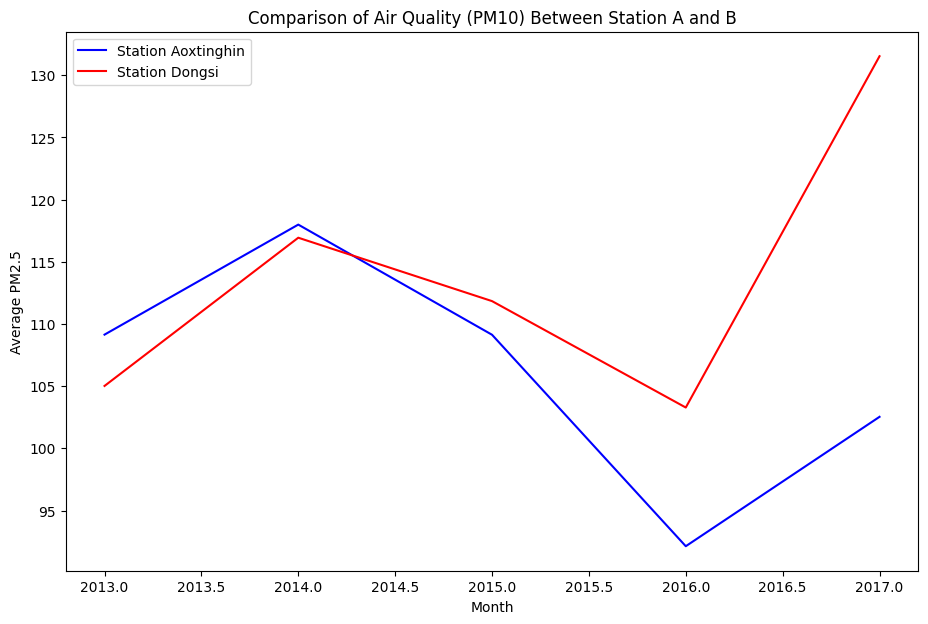

In [41]:
def ComparisonAirQuality():
    plt.figure(figsize=(11,7))
    plt.plot(RataRataTahunan['year'],RataRataTahunan['PM10'],label = 'Station Aoxtinghin' , color ='blue')
    plt.plot(Annual_AvarageAQI_inDongsi['year'],Annual_AvarageAQI_inDongsi['PM10'],label = 'Station Dongsi', color ='red')
    plt.xlabel('Month')
    plt.ylabel('Average PM2.5')
    plt.title('Comparison of Air Quality (PM10) Between Station A and B')
    plt.legend()
    plt.show()

ComparisonAirQuality()

In [26]:
Date_time = AQin_Aotizhongxin_df[['day','month','year']].astype(str).agg('-'.join,axis=1)
Date_time
AQin_Aotizhongxin_df['Date Time'] = Date_time
AQin_Aotizhongxin_df['Date Time'] = pd.to_datetime(AQin_Aotizhongxin_df['Date Time'], format='%d-%m-%Y')
AQin_Aotizhongxin_df
AQin_Aotizhongxin_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34261 entries, 0 to 35063
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   No         34261 non-null  int64         
 1   year       34261 non-null  int64         
 2   month      34261 non-null  int64         
 3   day        34261 non-null  int64         
 4   hour       34261 non-null  int64         
 5   PM2.5      34261 non-null  float64       
 6   PM10       34261 non-null  float64       
 7   SO2        34261 non-null  float64       
 8   NO2        34261 non-null  float64       
 9   CO         34261 non-null  float64       
 10  O3         34261 non-null  float64       
 11  TEMP       34261 non-null  float64       
 12  PRES       34261 non-null  float64       
 13  DEWP       34261 non-null  float64       
 14  RAIN       34261 non-null  float64       
 15  wd         34261 non-null  object        
 16  WSPM       34261 non-null  float64       
 17

In [45]:
AQin_Dongsi_df.to_csv('AQin_Dongsi.csv',index=False)

# Conclusion 

1. Conclution pertanyaan 1 : Bagaimana persentasi air quality di station Aotizhongxin dari tahun 2013 hingga tahun 2017 ? 
=> Dari analisis data kualitas udara di Stasiun Aotizhongxin selama periode 2013 hingga 2017, terdapat beberapa temuan penting. Pada tahun 2014, terjadi penurunan signifikan dalam kualitas udara, dengan nilai indeks kualitas udara mencapai 155. Nilai ini berada dalam kategori yang berbahaya dan dapat menyebabkan berbagai masalah kesehatan bagi masyarakat. Sebaliknya, tahun 2016 mencatatkan kualitas udara yang paling baik, dengan nilai indeks berada dalam rentang 135 hingga 137,5. Meskipun demikian, kondisi ini masih tergolong dalam kategori "unhealthy for sensitive groups," yang menunjukkan bahwa kelompok sensitif tetap berisiko terkena dampak kesehatan.
Secara keseluruhan, antara tahun 2014 dan 2016, kualitas udara mengalami penurunan yang mencolok, berpindah dari kategori "sangat tidak sehat" menuju kategori "unhealthy for sensitive groups." Hal ini menunjukkan perlunya perhatian lebih lanjut terhadap kualitas udara dan upaya untuk mengurangi pencemaran di daerah tersebut.

2. Bagaimana pollutant PM2.5 di setiap bulannya pada rentang tahun 2013 - 2016 ? 
==> Dari analisis kualitas data di Stasiun Aotizhongxin selama periode 2013 hingga 2016, dapat diidentifikasi bahwa nilai Indeks Kualitas Udara (AQI) dalam kategori "good" tercatat pada bulan Agustus 2015, serta pada bulan Februari dan Agustus 2016. Dalam konteks ini, penting untuk memahami bahwa AQI adalah ukuran yang digunakan untuk menilai kualitas udara berdasarkan konsentrasi polutan, seperti PM2.5 . Menurut standar yang ditetapkan oleh Badan Perlindungan Lingkungan Amerika Serikat (EPA), nilai AQI antara 0 hingga 50 menunjukkan kualitas udara yang baik, sedangkan nilai antara 51 hingga 100 tergolong dalam kategori "moderate," dan nilai 101 hingga 150 dikategorikan sebagai "unhealthy for sensitive groups."
Dari data yang dianalisis, terlihat bahwa rata-rata AQI untuk periode tersebut berada pada rentang warna kuning dan oranye, yang menunjukkan bahwa kualitas udara sering kali berada dalam kategori "unhealthy for sensitive groups" dan "moderate." Kategori "unhealthy for sensitive groups" mencerminkan bahwa individu dengan kondisi kesehatan tertentu, seperti anak-anak, lansia, dan orang dengan penyakit pernapasan, dapat mengalami dampak negatif terhadap kesehatan mereka akibat paparan polusi udara. Dalam konteks ini, meskipun ada beberapa periode di mana kualitas udara dinyatakan baik, fluktuasi yang terjadi di tahun-tahun lainnya menunjukkan pentingnya pengelolaan kualitas udara yang berkelanjutan untuk melindungi kesehatan masyarakat, serta perlunya strategi mitigasi untuk mengurangi emisi polutan yang berkontribusi terhadap pencemaran udara.






